In [159]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from scipy.optimize import minimize
import seaborn as sns

# Q1 Verify biasedness of skew and kurtosis functions

In [282]:

# we use 100 samples each with size 1000
np.random.seed(123)
sampleSize = 1000
sample = [10, 100, 1000]

skews10 = [0]*sample[0]
kurts10 = [0]*sample[0]
skews100 = [0]*sample[1]
kurts100 = [0]*sample[1]
skews1000 = [0]*sample[2]
kurts1000 = [0]*sample[2]

# sample the data and calculate skewness and kurtosis
for i in range(sample[0]):
    samp = np.random.normal(size=sampleSize)
    skews10[i] = stats.skew(samp)
    kurts10[i] = stats.kurtosis(samp)
for i in range(sample[1]):
    samp = np.random.normal(size=sampleSize)
    skews100[i] = stats.skew(samp)
    kurts100[i] = stats.kurtosis(samp)
for i in range(sample[2]):
    samp = np.random.normal(size=sampleSize)
    skews1000[i] = stats.skew(samp)
    kurts1000[i] = stats.kurtosis(samp)

In [283]:
# below two blocks uses t-test method in scipy to test the significance of 
# skew and kurtosis method in scipy package
print(stats.ttest_1samp(skews10, popmean=0))
print(stats.ttest_1samp(skews100, popmean=0))
print(stats.ttest_1samp(skews1000, popmean=0))

Ttest_1sampResult(statistic=-0.012318919615336637, pvalue=0.9904399269647166)
Ttest_1sampResult(statistic=0.4781594937330201, pvalue=0.6335908867682458)
Ttest_1sampResult(statistic=-0.20892523035677835, pvalue=0.8345491995597369)


In [284]:
print(stats.ttest_1samp(kurts10, popmean=0))
print(stats.ttest_1samp(kurts100, popmean=0))
print(stats.ttest_1samp(kurts1000, popmean=0))

Ttest_1sampResult(statistic=-0.8438989488137114, pvalue=0.4205898745171571)
Ttest_1sampResult(statistic=-1.4510754759610878, pvalue=0.14992019285117478)
Ttest_1sampResult(statistic=-2.234805462232717, pvalue=0.025650568870257413)


# Q2 Regress OLS with data provided and study the errors; fit MLE using different assumption

In [286]:
# read the data and setup the model
data = pd.read_csv("problem2.csv")
model = linear_model.LinearRegression()
x = np.array(data["x"]).reshape(-1, 1)
y = np.array(data["y"]).reshape(-1, 1)

In [287]:
# fit the model
model.fit(x, y)
intercept = model.intercept_
coef = model.coef_[0]
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

# calculate the error vector
resid = model.predict(x) - y

Intercept:  [0.1198362]
Coefficients:  [[0.60520482]]


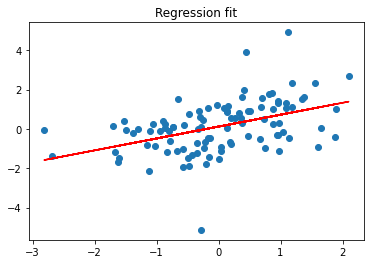

In [288]:
# plot scatter of x against y to see the pattern of data
plt.scatter(x, y)
 
# finding the maximum and minimum values of x, to get the
# range of data
max_x = data['x'].max()
min_x = data['x'].min()

# plotting the regression line
plt.plot(x, coef*x+intercept, 'r')
plt.title("Regression fit")
plt.savefig("p2_linreg")
plt.show()

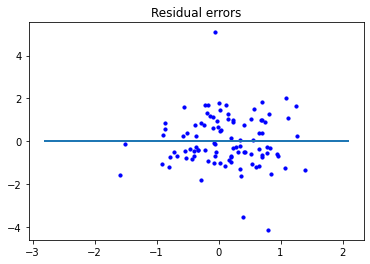

In [290]:
# plot the residuals of regression
plt.scatter(model.predict(x), resid, color="blue", s=10)
plt.hlines(y=0, xmin=min_x, xmax=max_x, linewidth=2)
plt.title("Residual errors")
plt.savefig("errors1")
plt.show()

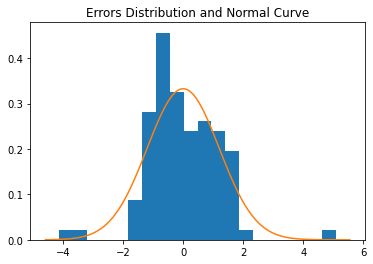

In [291]:
# Plot the histogram and normal curve of errors
mu, std = stats.norm.fit(resid)
plt.figure()
plt.hist(resid, bins=20, density=True, label = 'errors')
min_x, max_x = plt.xlim()
xaxis = np.linspace(min_x, max_x, 100)
p = stats.norm.pdf(xaxis, mu, std)
plt.plot(xaxis, p, label = 'norm curve')
plt.title("Errors Distribution and Normal Curve")
plt.savefig("errors2")
plt.show()

In [187]:
# Can also use shapiro wilk test to test the normality of errors
testStats, p = stats.shapiro(resid)
p

0.0001538837095722556

In [204]:
# Define likelihood functions for under normal and t distribution
def nLL(params):
    a = params[0]
    b = params[1]
    s = params[2]
    errDistr = stats.norm(0, s)
    error = y - a - b * x
    ll = -np.log(errDistr.pdf(error)).sum()
    return ll

def tLL(params):
    a = params[0]
    b = params[1]
    df = params[2]
    s = params[3]
    errDistr = stats.t(df, s)
    error = y - a - b * x
    ll = -np.log(errDistr.pdf(error)).sum()
    return ll
# Setup the initial parameters for optimization
nParams = [1, 1, 1]
tParams = [1, 1, 1, 1]

In [201]:
# optimize to get mle under normal distribution
nRes = minimize(nLL, nParams)
print(nRes)

      fun: 159.9920966891626
 hess_inv: array([[ 1.41777469e-02, -1.02957595e-04, -5.26019612e-05],
       [-1.02957595e-04,  1.53701801e-02, -3.12367823e-04],
       [-5.26019612e-05, -3.12367823e-04,  7.44927758e-03]])
      jac: array([ 1.90734863e-06,  3.81469727e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.11983623, 0.60520488, 1.19839408])


In [205]:
# optimize to get mle under t dsitribution
tRes = minimize(tLL, tParams)
print(tRes)

      fun: 155.5152872758879
 hess_inv: array([[ 5.03346374e-01,  9.74977354e-04, -1.11094804e-02,
        -4.96653626e-01],
       [ 9.74977354e-04,  1.43130432e-02,  1.12976712e-02,
         9.74977354e-04],
       [-1.11094804e-02,  1.12976712e-02,  7.71983647e+00,
        -1.11094804e-02],
       [-4.96653626e-01,  9.74977354e-04, -1.11094804e-02,
         5.03346374e-01]])
      jac: array([-9.53674316e-06, -7.62939453e-06,  7.62939453e-06, -9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 13
     njev: 15
   status: 0
  success: True
        x: array([0.06998058, 0.55893049, 6.75739342, 0.06998058])


In [292]:
# Check for the goodness of fit
def R2(x, y, a, b):   
    ypred = a + b * x
    ybar = np.mean(y)
    error = y - a - b * x
    ssTot = np.sum((y - ybar) ** 2)
    ssReg = np.sum((ypred - ybar) ** 2)
    r2 = ssReg / ssTot

    return r2

def infoCriterion(x, k, ll):
    AIC = 2 * k + 2 * ll
    BIC = k * np.log(len(x)) + 2 * ll
    return AIC, BIC

In [293]:
r2Norm = R2(x , y, nRes.x[0], nRes.x[1])
r2T = R2(x , y, tRes.x[0], tRes.x[1])
print("R^2 under normal: {}".format(r2Norm))
print("R^2 under T distribution : {}".format(r2T))

R^2 under normal: 0.1946395618115765
R^2 under T distribution : 0.16740649729066678


In [294]:
AIC_N, BIC_N = infoCriterion(x, 2, nRes.fun)
AIC_T, BIC_T = infoCriterion(x, 2, tRes.fun)
print("AIC normal: {}; BIC normal: {}".format(AIC_N, BIC_N))
print("AIC T distribution: {}; BIC T distribution: {}".format(AIC_T, BIC_T))

AIC normal: 323.9841933783252; BIC normal: 329.1945337503014
AIC T distribution: 315.0305745517758; BIC T distribution: 320.24091492375203


# Q3 Simulate AR(1) through AR(3) and MA(1) through MA(3), and compare the ACF and PACF graphs

In [299]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nsample = 1000
lag = 24

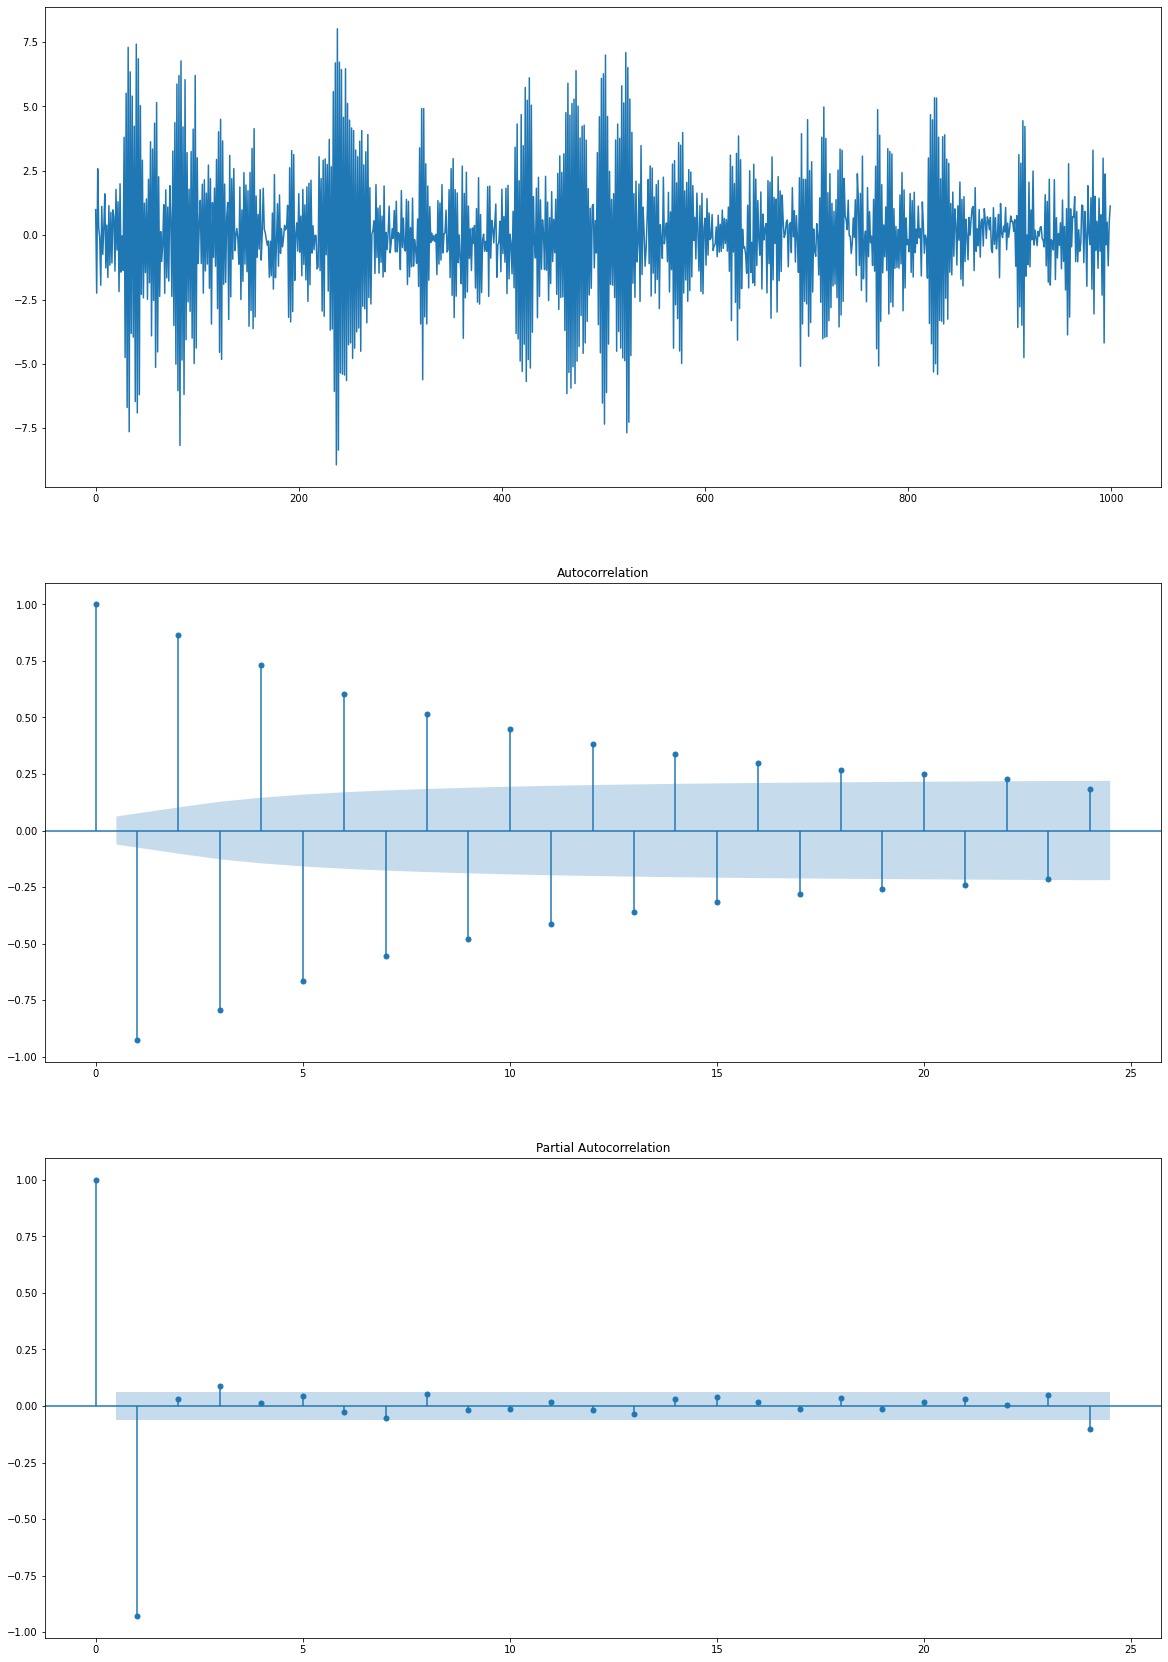

In [314]:
# Simulate AR(1) process
ar = [1, 0.9] # set the AR(1) parameters
ma = [1] # set the MA(0) parameters
ar1 = sm.tsa.ArmaProcess(ar, ma)
y = ar1.generate_sample(nsample=nsample)

# Plot the ACF and PACF of the AR(1) process
fig, axis = plt.subplots(3, 1, figsize=(20,30))
axis[0].plot(y)
plt.title("AR(1) process")
plot_acf(y, lags=lag, ax = axis[1])
plot_pacf(y, lags=lag, ax = axis[2])
plt.savefig("AR(1)")
plt.show()

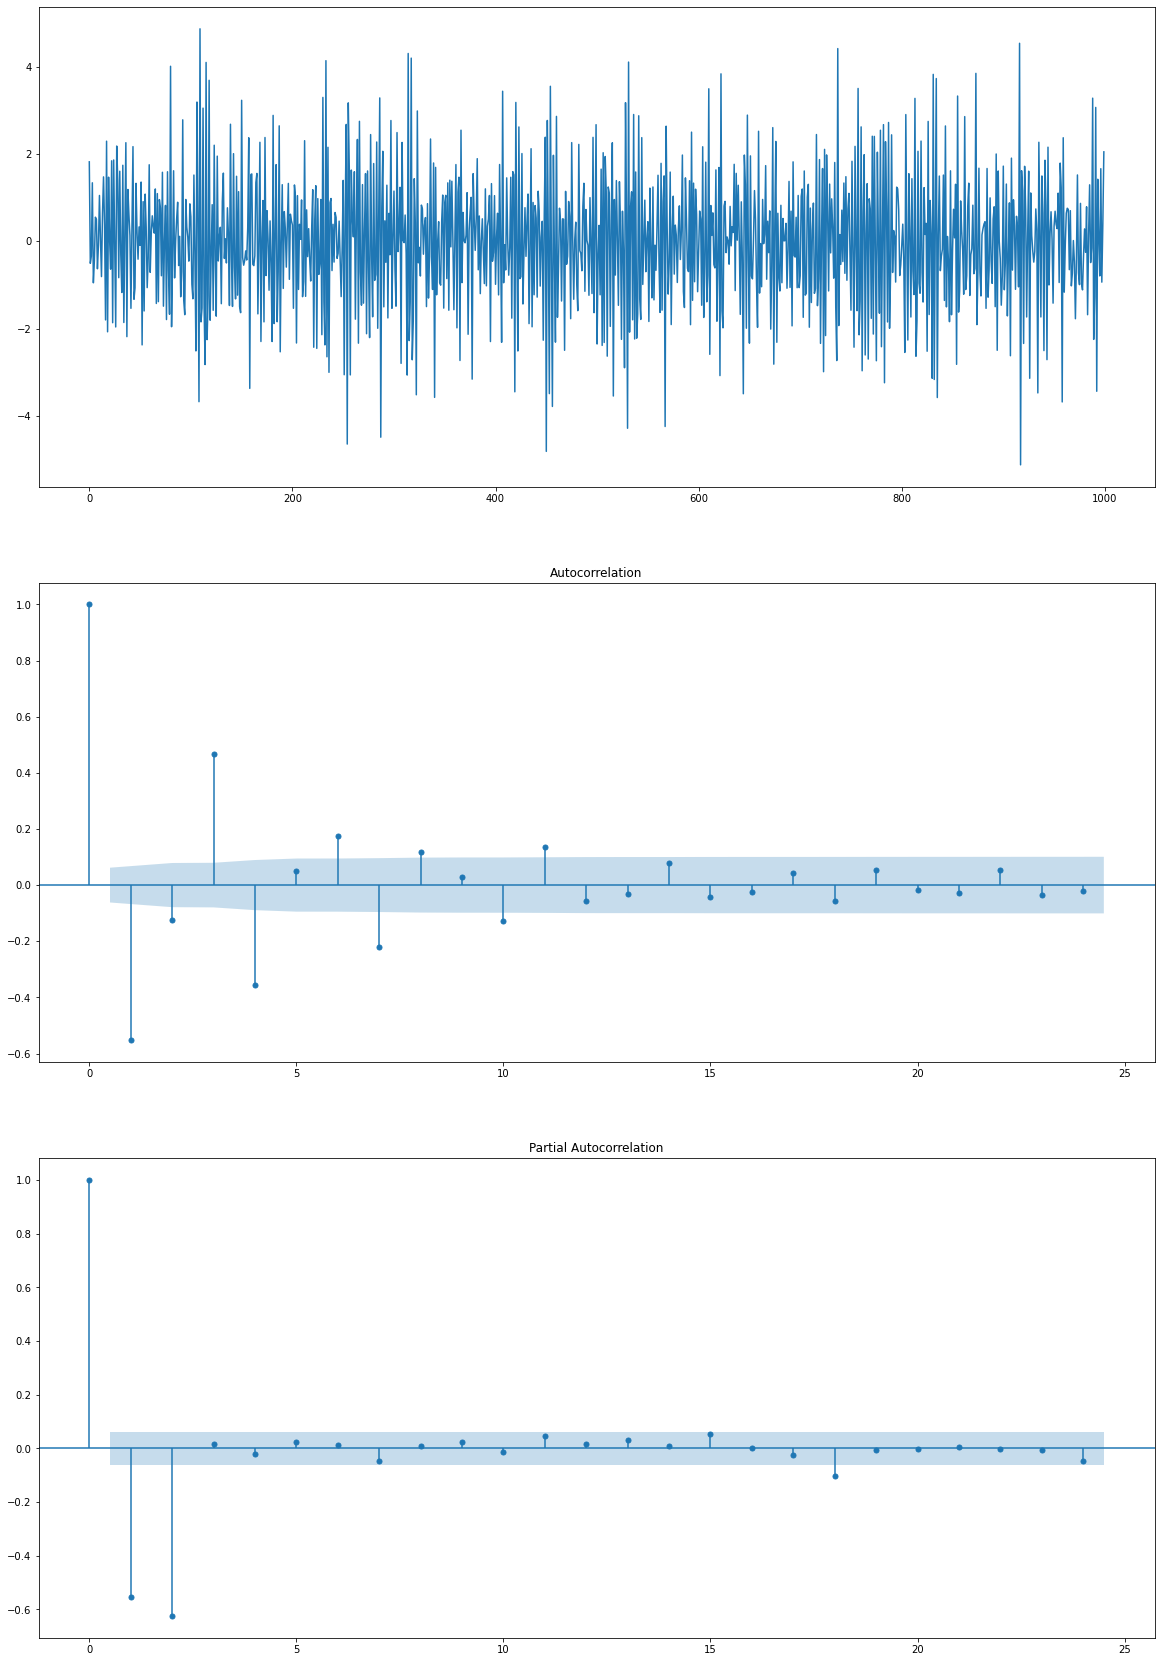

In [315]:
# Simulate AR(2) process
ar = [1, 0.9, 0.6] # set the AR(2) parameters
ma = [1] # set the MA(0) parameters
ar1 = sm.tsa.ArmaProcess(ar, ma)
y = ar1.generate_sample(nsample=nsample)

# Plot the ACF and PACF of the AR(2) process
fig, axis = plt.subplots(3, 1, figsize=(20,30))
axis[0].plot(y)
plt.title("AR(2) process")
plot_acf(y, lags=lag, ax = axis[1])
plot_pacf(y, lags=lag, ax = axis[2])
plt.savefig("AR(2)")
plt.show()

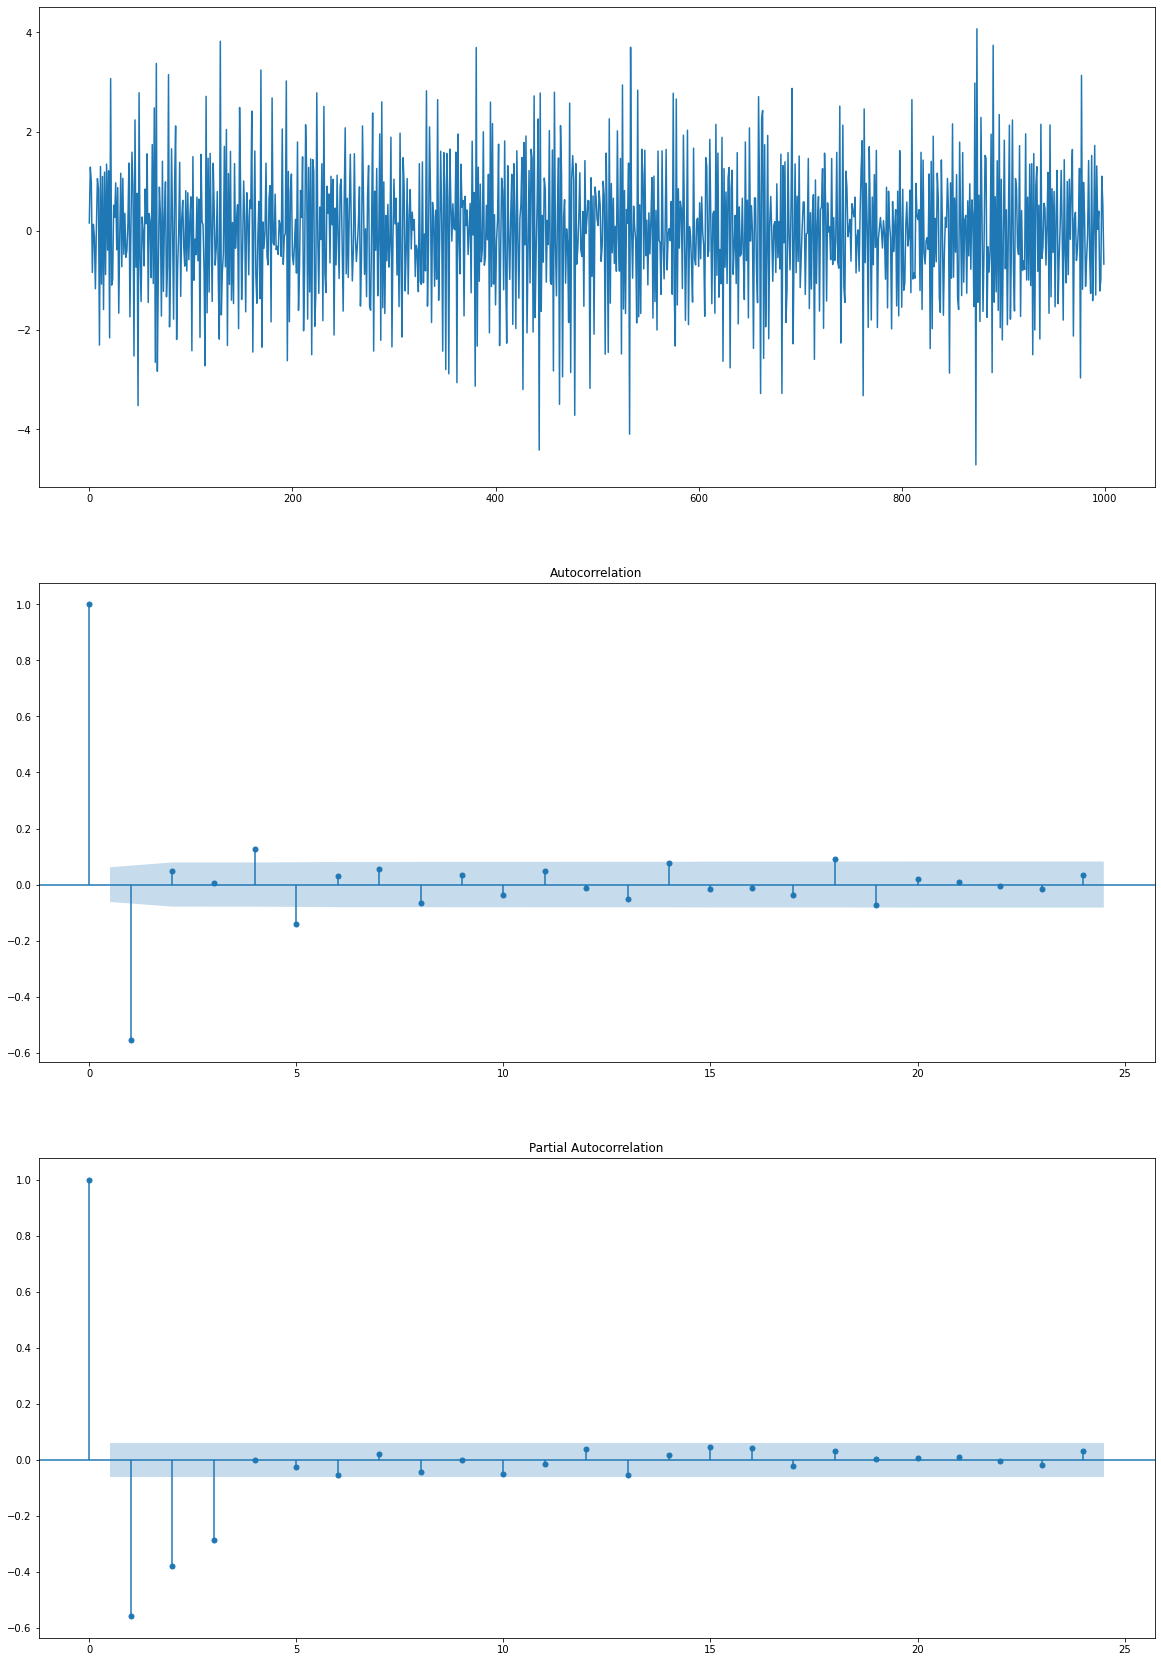

In [316]:
# Simulate AR(3) process
ar = [1, 0.9, 0.6, 0.3] # set the AR(3) parameters
ma = [1] # set the MA(0) parameters
ar1 = sm.tsa.ArmaProcess(ar, ma)
y = ar1.generate_sample(nsample=nsample)

# Plot the ACF and PACF of the AR(3) process
fig, axis = plt.subplots(3, 1, figsize=(20,30))
axis[0].plot(y)
plt.title("AR(3) process")
plot_acf(y, lags=lag, ax = axis[1])
plot_pacf(y, lags=lag, ax = axis[2])
plt.savefig("AR(3)")
plt.show()

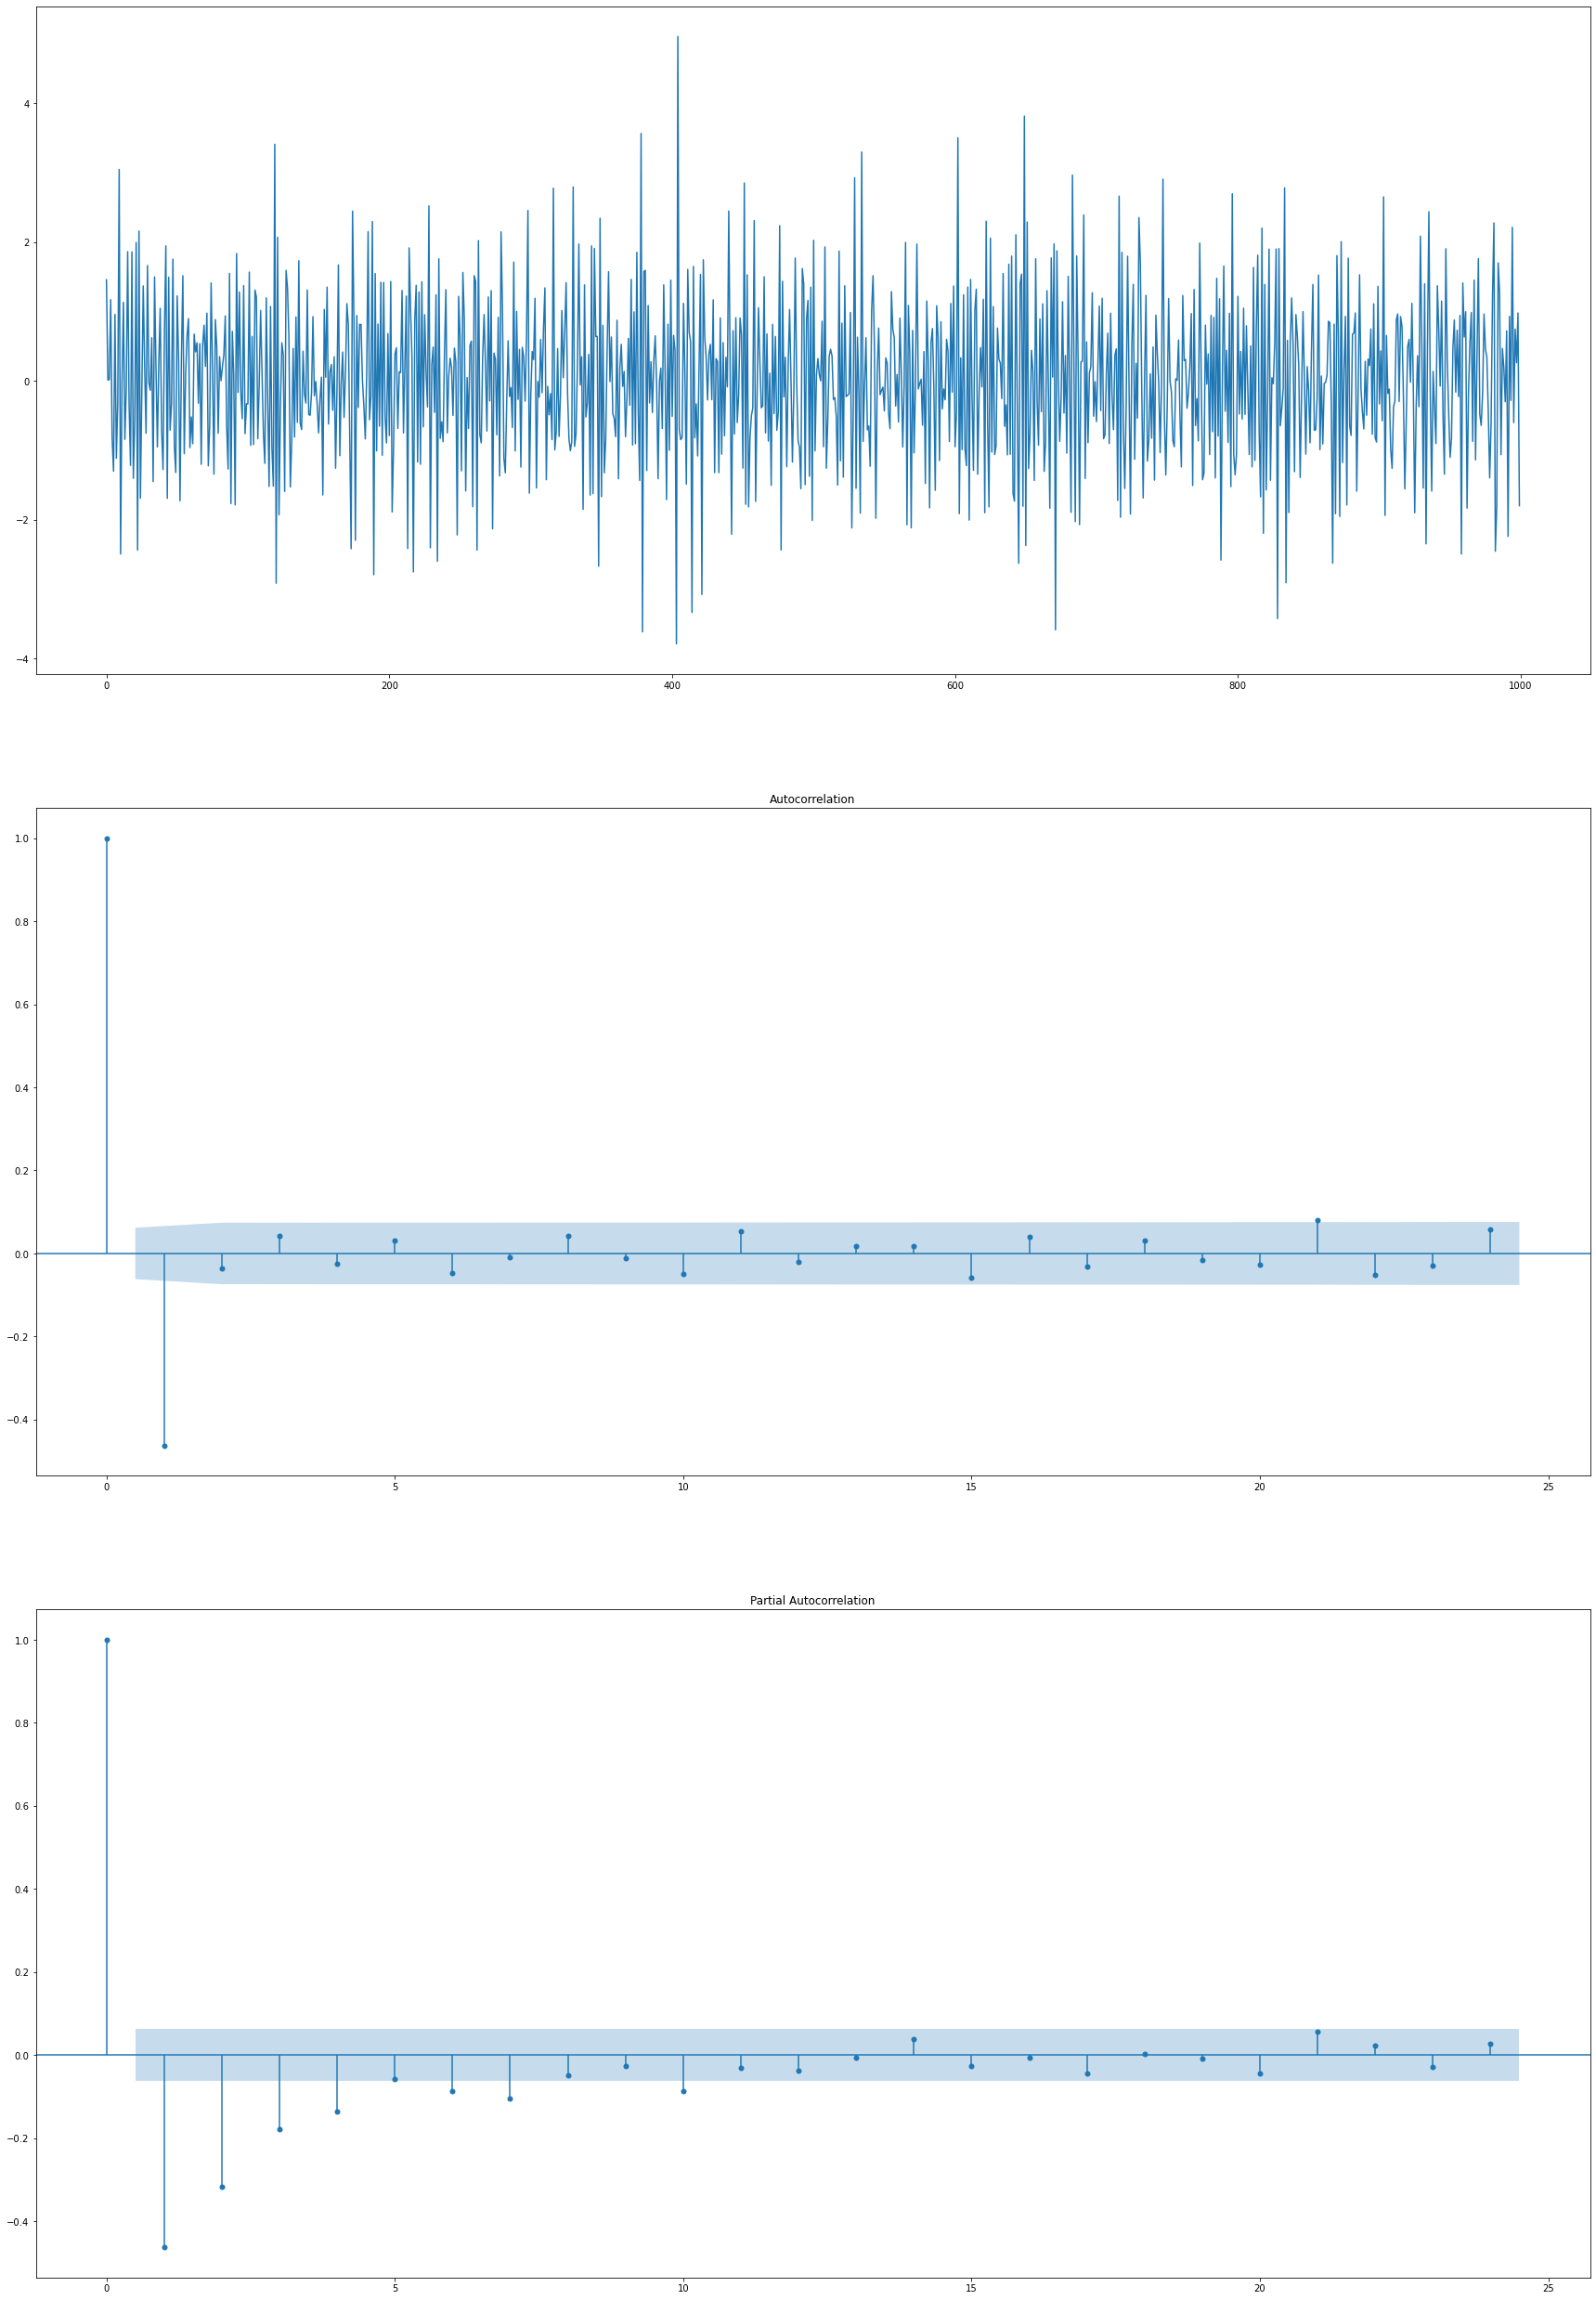

In [317]:
# Simulate MA(1) process
ar = [1] # set the AR(0) parameters
ma = [1, -0.75] # set the MA(1) parameters
ar1 = sm.tsa.ArmaProcess(ar, ma)
y = ar1.generate_sample(nsample=nsample)

# Plot the ACF and PACF of the MA(1) process
fig, axis = plt.subplots(3, 1, figsize=(30,45))
axis[0].plot(y)
plt.title("MA(1) process")
plot_acf(y, lags=lag, ax = axis[1])
plot_pacf(y, lags=lag, ax = axis[2])
plt.savefig("MA(1)")
plt.show()

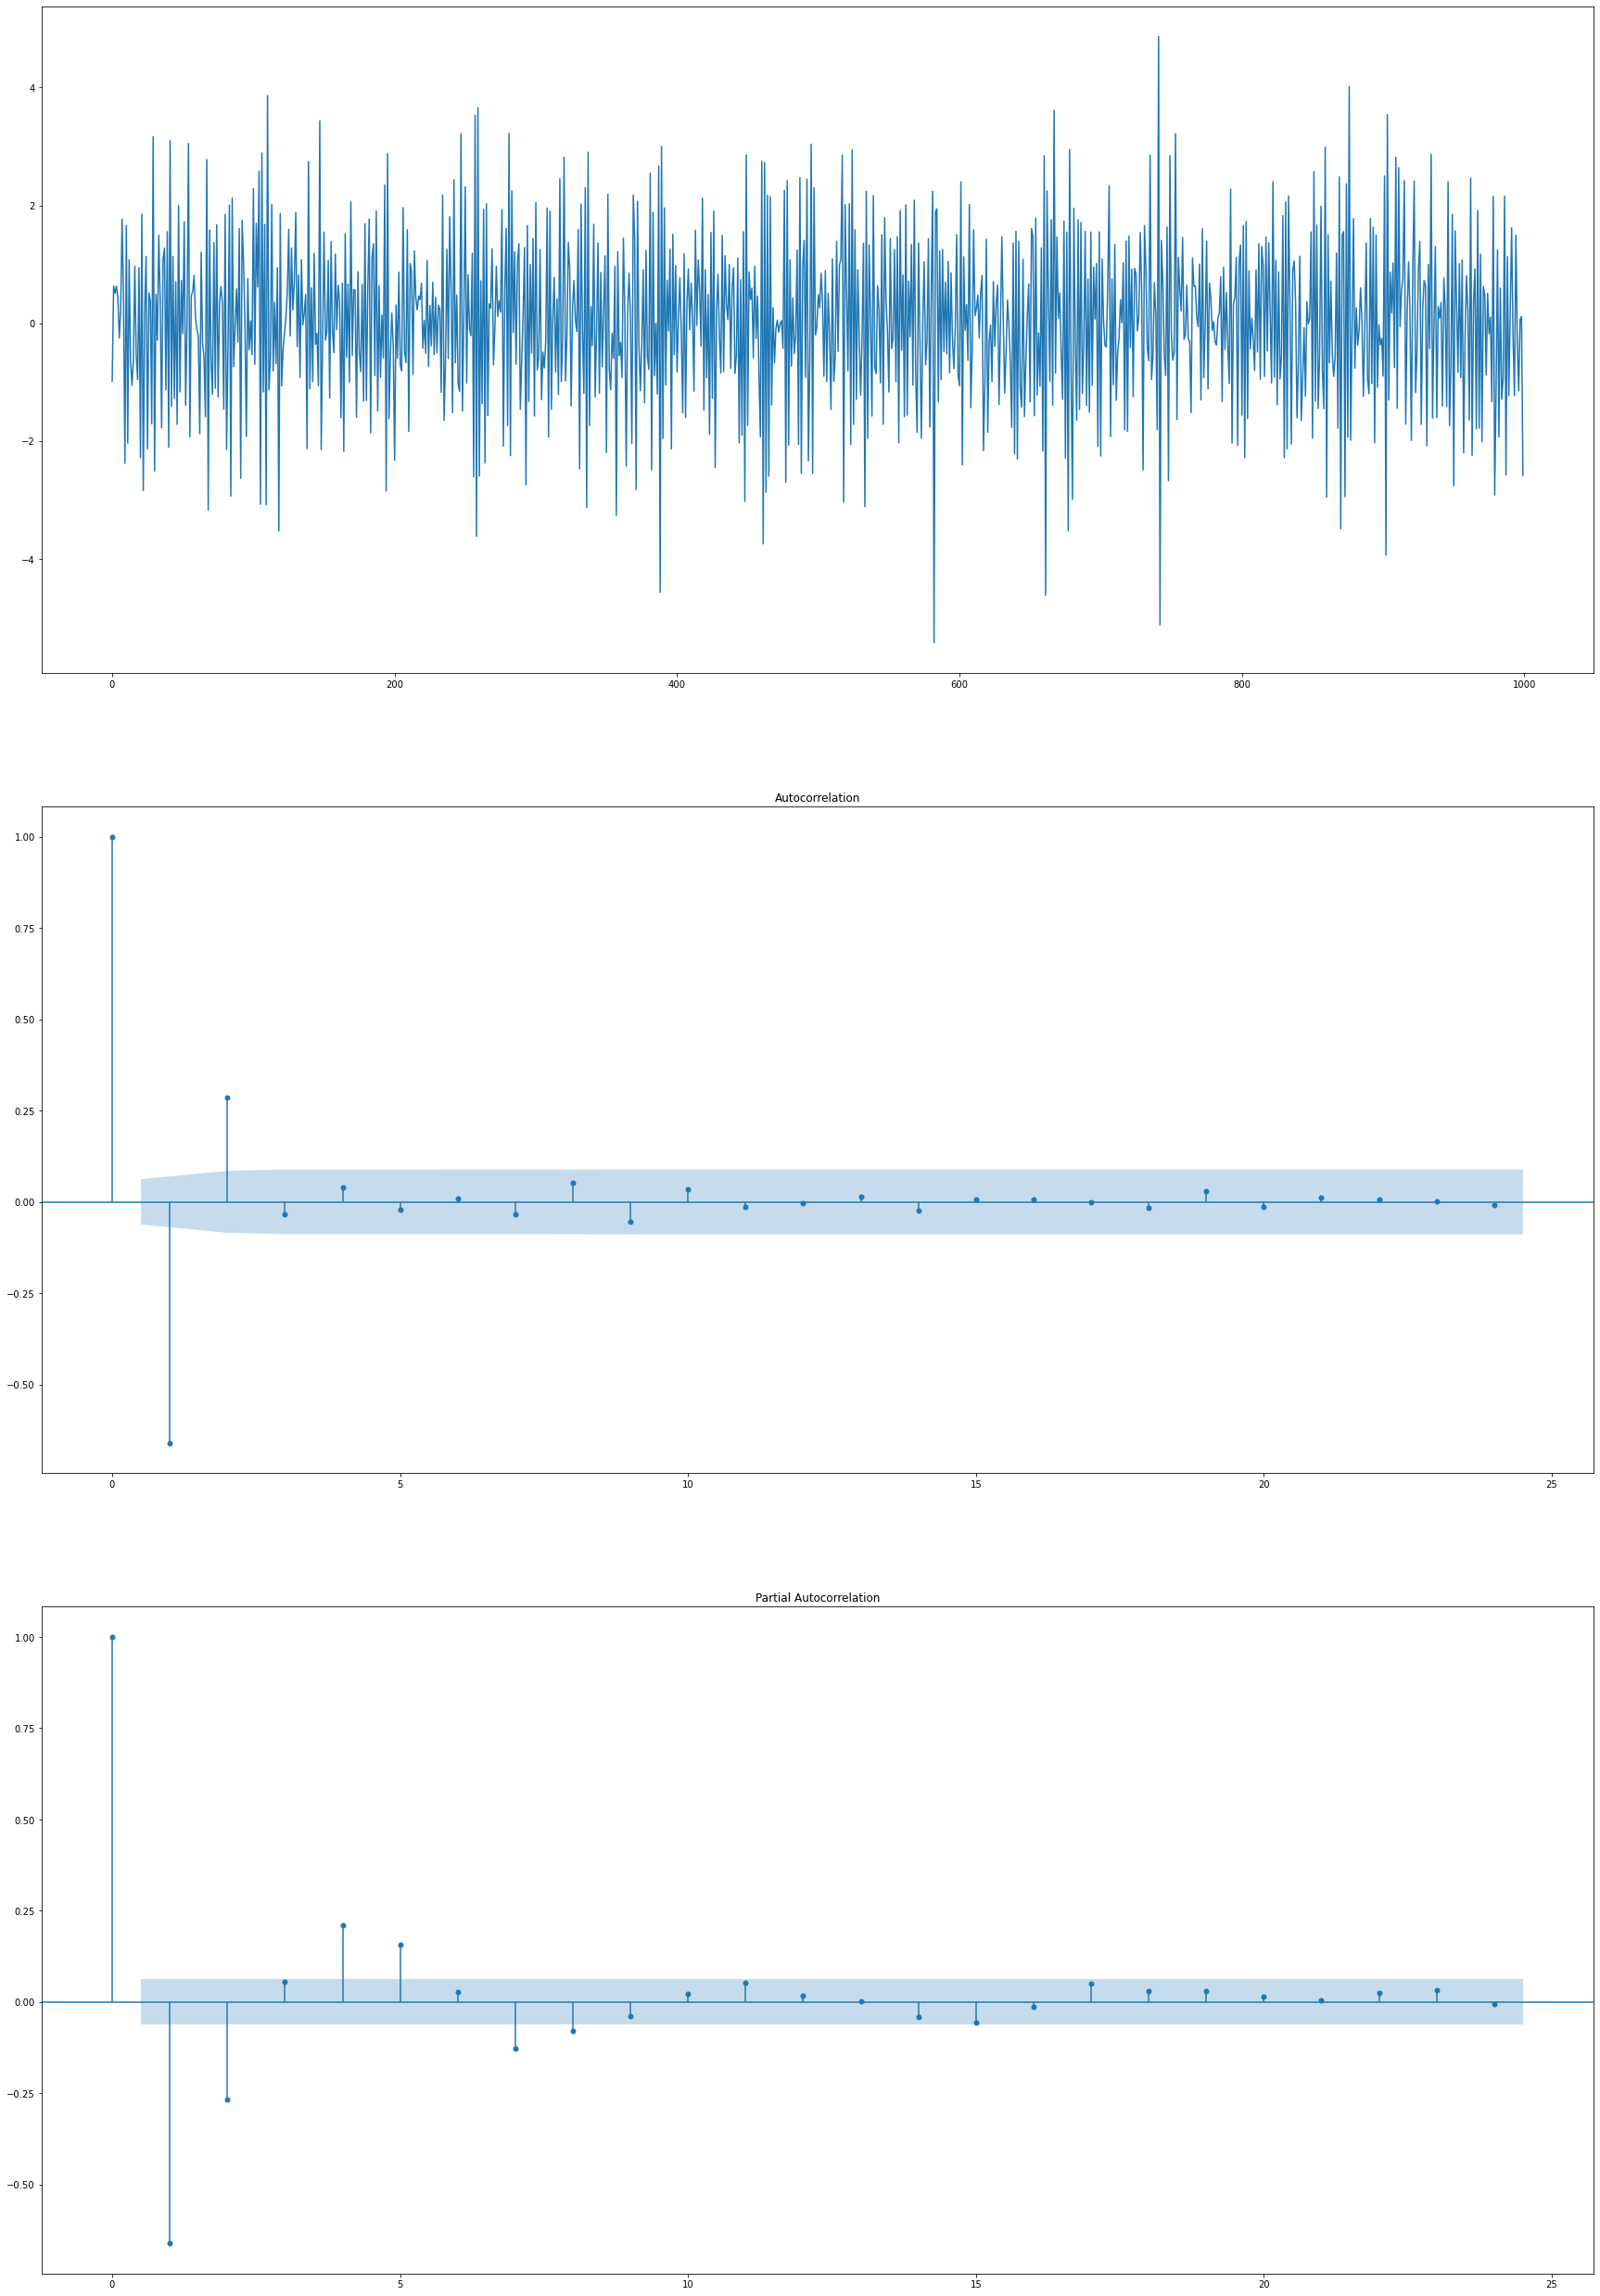

In [318]:
# Simulate MA(2) process
ar = [1] # set the AR(0) parameters
ma = [1, -0.9, 0.6] # set the MA(2) parameters
ar1 = sm.tsa.ArmaProcess(ar, ma)
y = ar1.generate_sample(nsample=nsample)

# Plot the ACF and PACF of the MA(2) process
fig, axis = plt.subplots(3, 1, figsize=(30,45))
axis[0].plot(y)
plt.title("MA(2) process")
plot_acf(y, lags=lag, ax = axis[1])
plot_pacf(y, lags=lag, ax = axis[2])
plt.savefig("MA(2)")
plt.show()

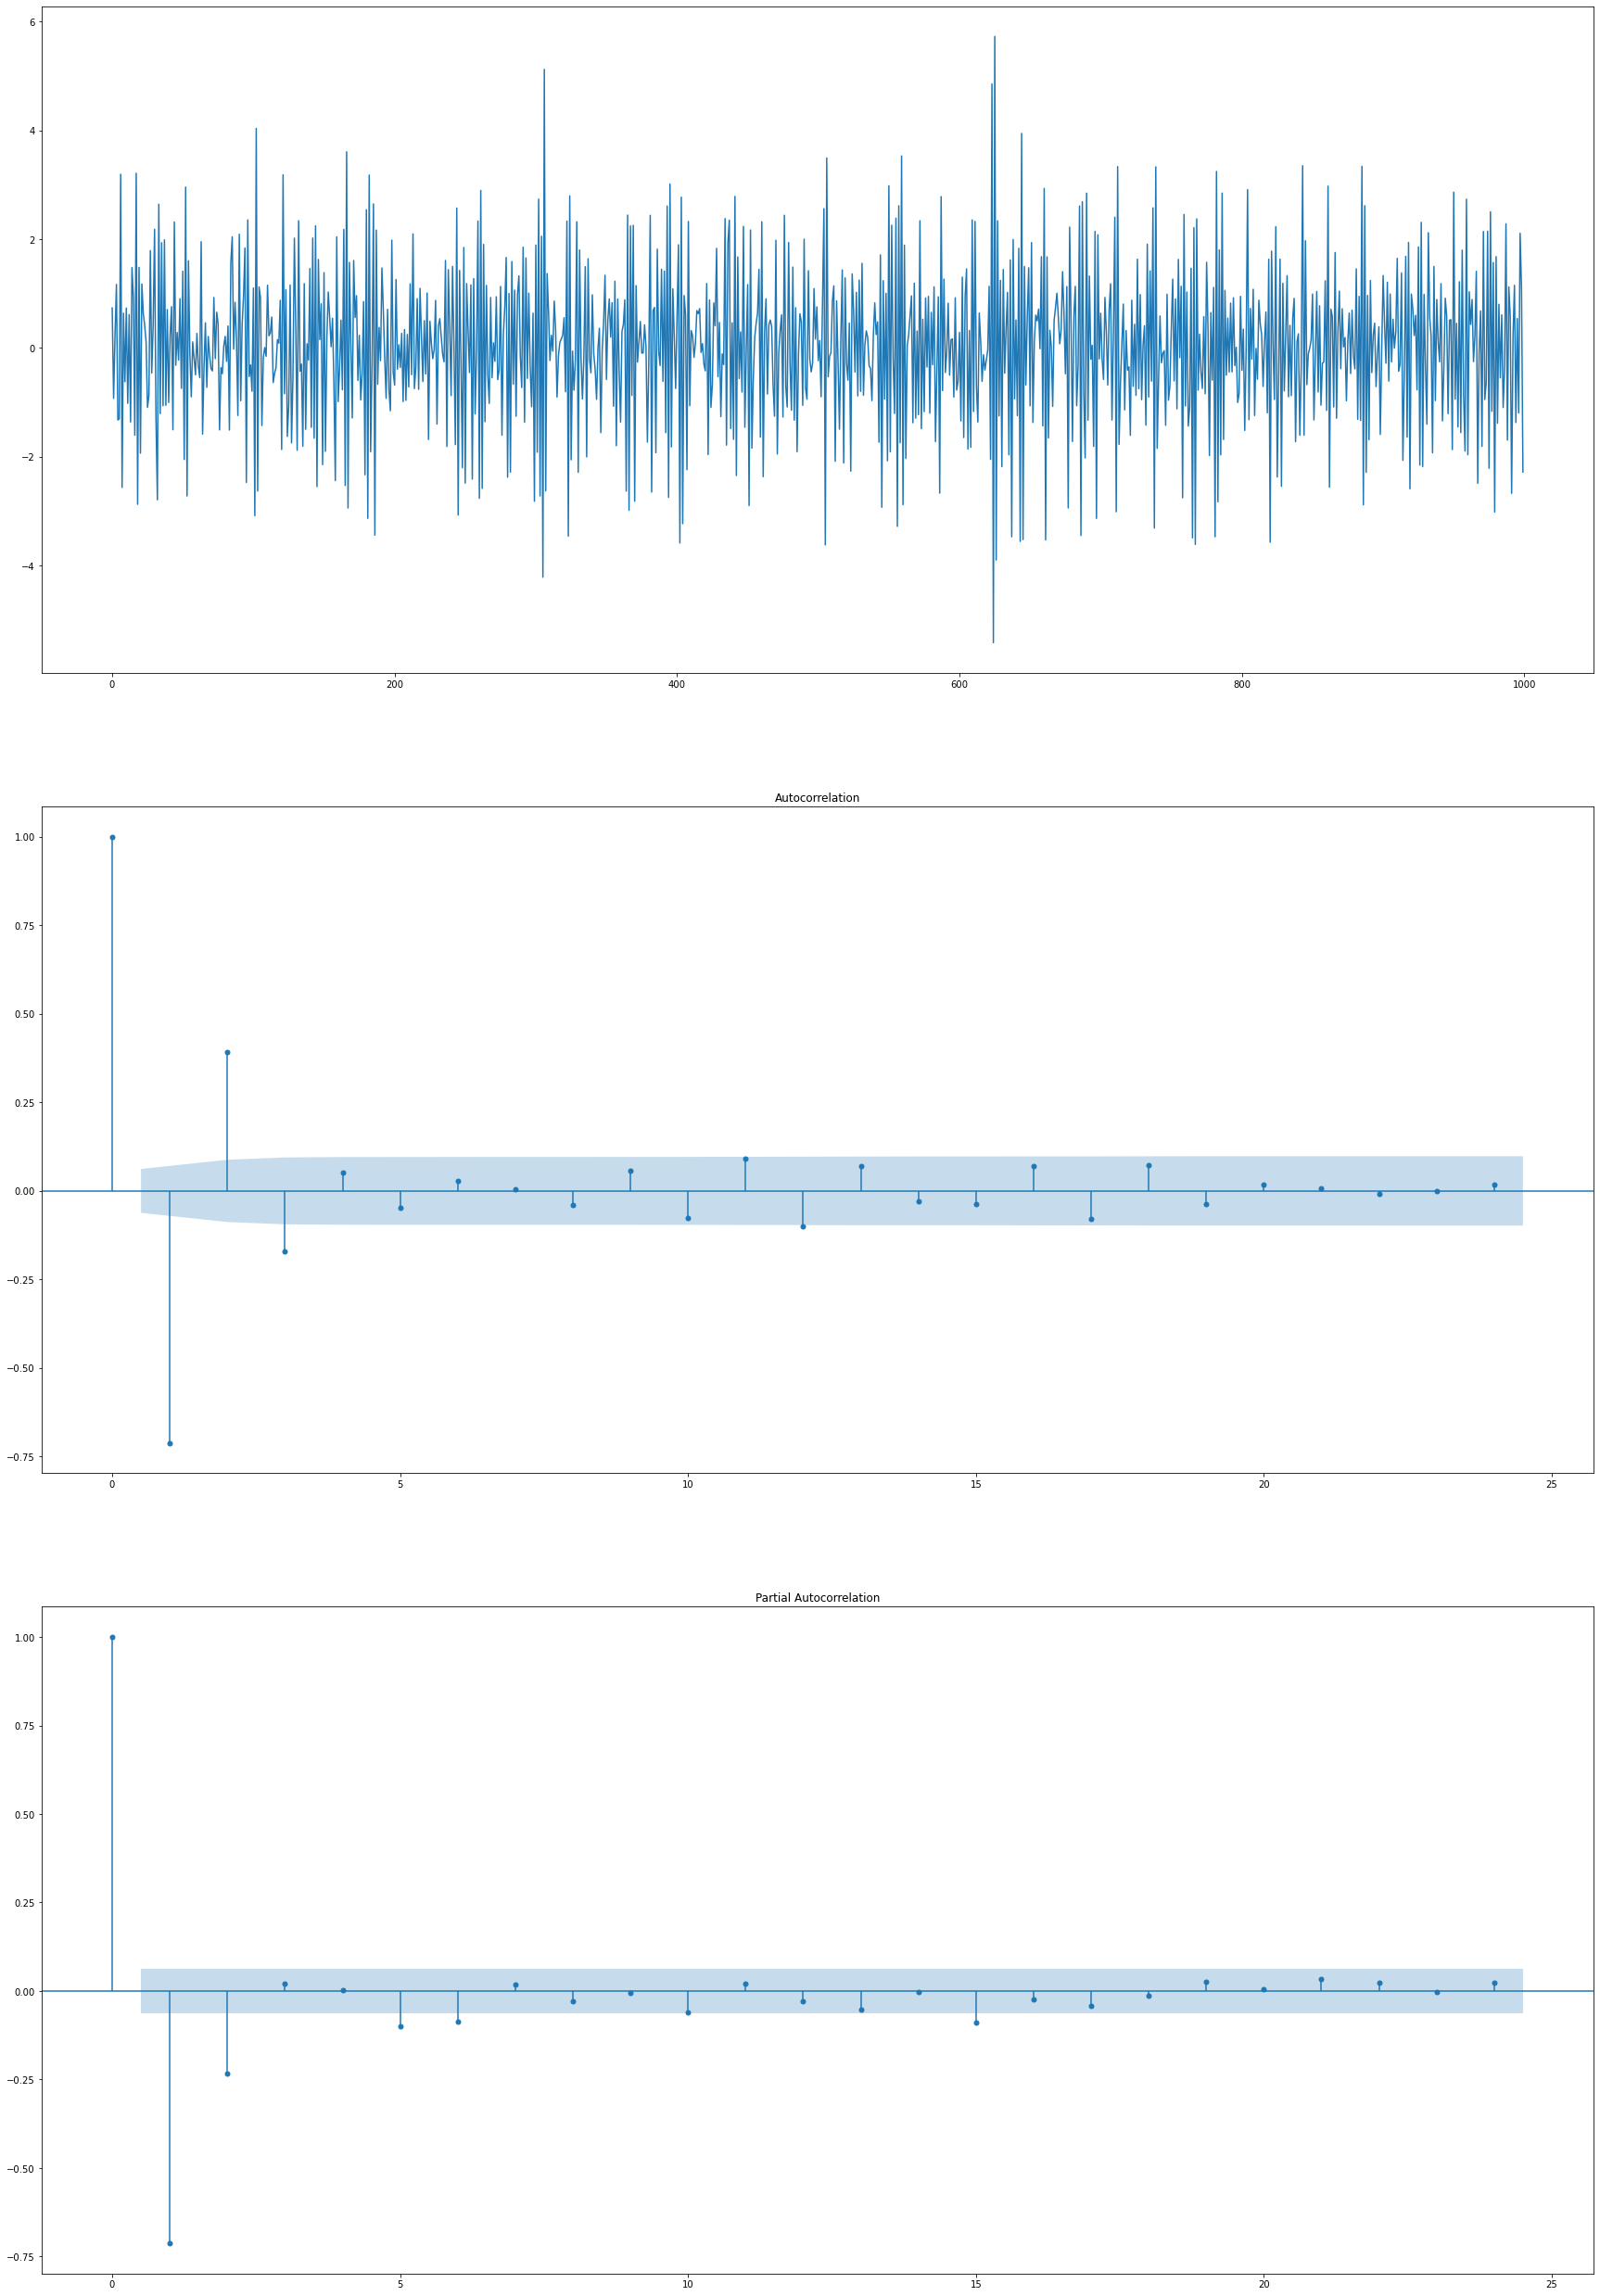

In [319]:
# Simulate MA(3) process
ar = [1] # set the AR(0) parameters
ma = [1, -0.9, 0.6, -0.3] # set the MA(3) parameters
ar1 = sm.tsa.ArmaProcess(ar, ma)
y = ar1.generate_sample(nsample=nsample)

# Plot the ACF and PACF of the MA(3) process
fig, axis = plt.subplots(3, 1, figsize=(30,45))
axis[0].plot(y)
plt.title("MA(3) process")
plot_acf(y, lags=lag, ax = axis[1])
plot_pacf(y, lags=lag, ax = axis[2])
plt.savefig("MA(3)")
plt.show()